In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("/content/data_science.csv")
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
df.shape

(607, 12)

In [4]:
df.drop(["Unnamed: 0","salary"],axis = 1,inplace=True)

In [5]:
df1 = df.groupby("work_year")["salary_in_usd"].mean().round(2)
df1

work_year
2020     95813.00
2021     99853.79
2022    124522.01
Name: salary_in_usd, dtype: float64

<Axes: xlabel='work_year'>

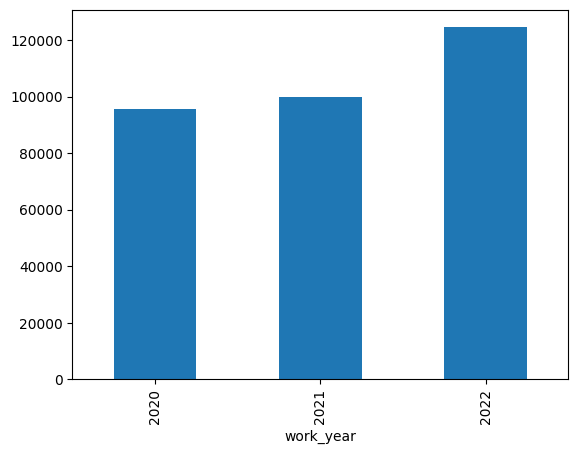

In [6]:
df1.plot(kind="bar")

In [7]:
df1.index

Index([2020, 2021, 2022], dtype='int64', name='work_year')

In [8]:
df1.values

array([ 95813.  ,  99853.79, 124522.01])

In [9]:
data = {
    "work_year":df1.index,
    "average_salary": df1.values
}
df1 = pd.DataFrame(data)
df1

,work_year,average_salary
0,2020,95813.00
1,2021,99853.79
2,2022,124522.01


In [10]:
df1["average_salary"] = (df1["average_salary"]/1000).round(2)

In [11]:
df1

,work_year,average_salary
0,2020,95.81
1,2021,99.85
2,2022,124.52


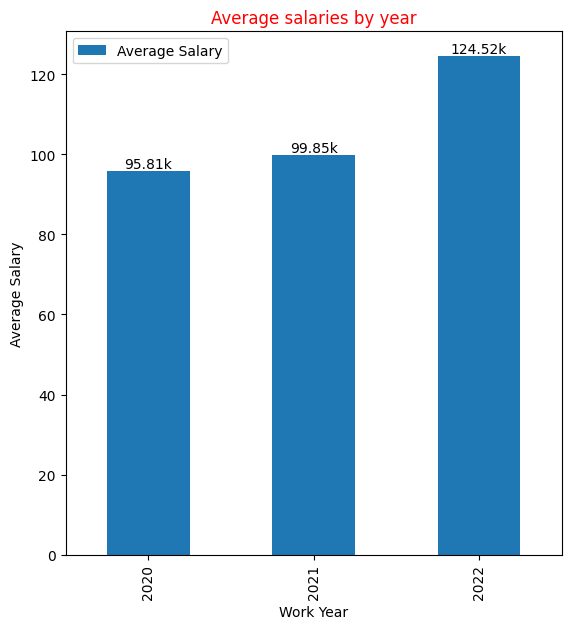

In [12]:
ax = df1.plot(kind="bar",x = "work_year",y = "average_salary",legend = True)
ax.bar_label(ax.containers[0],labels = df1["average_salary"].map("{:.2f}k".format))
plt.subplots_adjust(top = 1.2)

ax.legend(["Average Salary"],loc = "upper left")

plt.xlabel("Work Year")
plt.ylabel("Average Salary")
plt.title("Average salaries by year" ,color = "red")
plt.show()

In [13]:
df2 = df.remote_ratio.value_counts()
df2

remote_ratio
100    381
0      127
50      99
Name: count, dtype: int64

In [14]:
values = df2.to_list()

In [15]:
labels = ["Fully remote","No remote","Partially remote"]

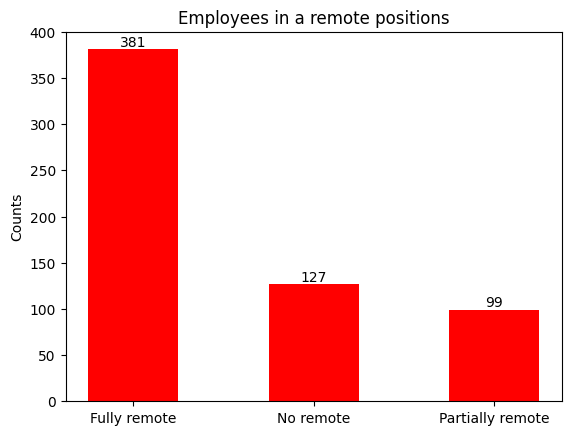

In [16]:
z = plt.bar(labels,values,width = 0.5,color = "red")
plt.bar_label(z,labels = values)
plt.title("Employees in a remote positions")
plt.ylabel("Counts")
plt.show()

In [17]:
df3 = df.company_size.value_counts()
df3

company_size
M    326
L    198
S     83
Name: count, dtype: int64

In [18]:
df3.index.to_list()

['M', 'L', 'S']

In [19]:
values2 = df3.values

In [20]:
labels_for_company = ["Medium" ,"Large","Small"]

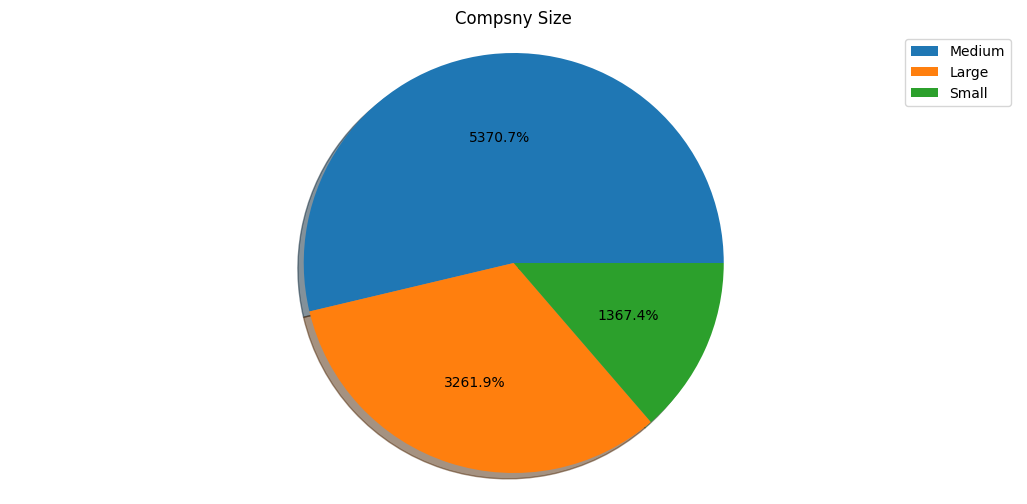

In [21]:
plt.figure(figsize = (13,6))
plt.pie(x = values2,labels = None,autopct = "{:.1%}".format,shadow = True)
plt.legend(labels = labels_for_company,loc = "upper right" )
plt.axis("equal")
plt.title("Compsny Size")
plt.show()

In [22]:
df4 = df.job_title.value_counts()[:5]
df4

job_title
Data Scientist               143
Data Engineer                132
Data Analyst                  97
Machine Learning Engineer     41
Research Scientist            16
Name: count, dtype: int64

<ipython-input-23-807ed0bb66ae>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df4.index,y = df4.values,palette = "viridis")


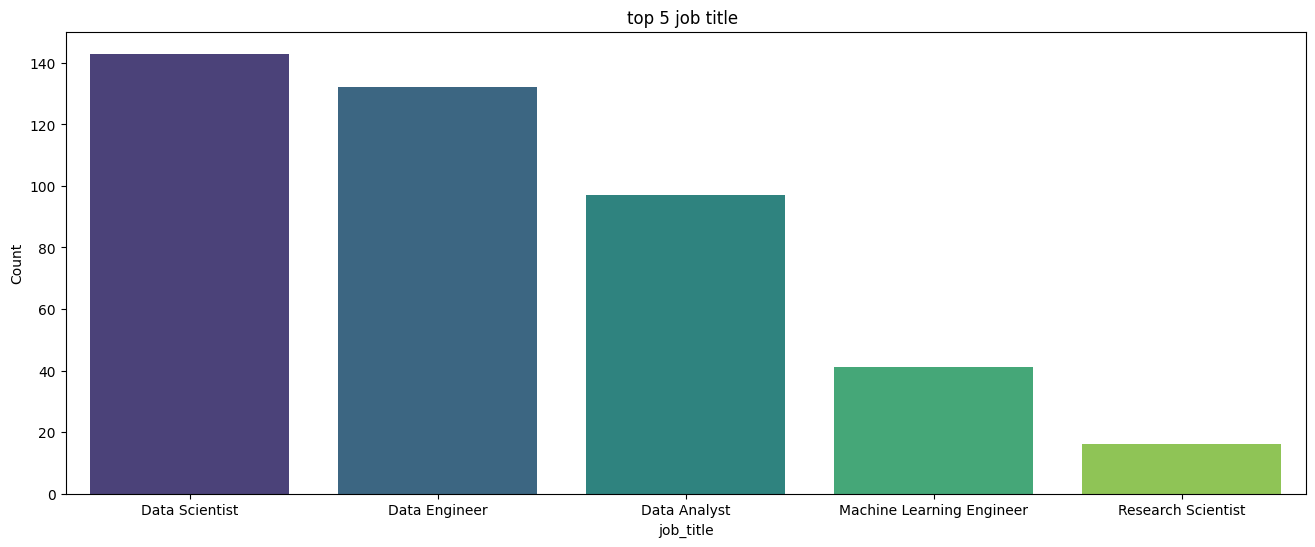

In [23]:
plt.figure(figsize = (16,6))
sns.barplot(x=df4.index,y = df4.values,palette = "viridis")
plt.title("top 5 job title ")
plt.ylabel("Count")
plt.show()

In [24]:
df5 = df[["salary_in_usd","company_size"]]
df5

,salary_in_usd,company_size
0,79833,L
1,260000,S
2,109024,M
3,20000,S
4,150000,L
...,...,...
602,154000,M
603,126000,M
604,129000,M
605,150000,M


In [25]:
S = df5[df5["company_size"] == "S"]
M = df5[df5["company_size"] == "M"]
L = df5[df5["company_size"] == "L"]

labels = ["Medium","Large","Small"]

sal_mean = [S["salary_in_usd"].mean(),M["salary_in_usd"].mean(),L["salary_in_usd"].mean()]

In [26]:
sal_mean

[77632.67469879518, 116905.46625766871, 119242.99494949495]

In [27]:
label_change = np.round([x/1000 for x in sal_mean],2)
label_change = list(map(str,label_change))
label_change = [x + "K" for x in label_change]
label_change

['77.63K', '116.91K', '119.24K']

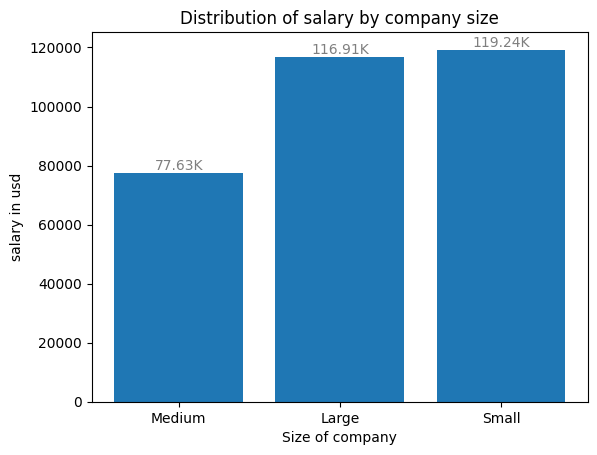

In [29]:
z = plt.bar(labels,sal_mean)
plt.bar_label(z,label_change,alpha = 0.5)
plt.title("Distribution of salary by company size")
plt.xlabel("Size of company")
plt.ylabel("salary in usd")
plt.show()

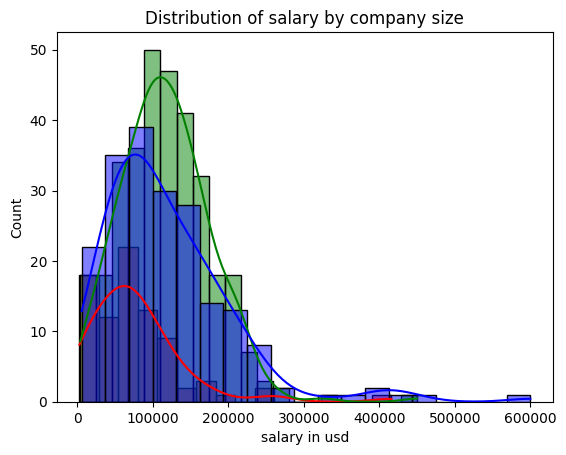

In [32]:
sns.histplot(S["salary_in_usd"],label = "Small",kde = True,color = "red")
sns.histplot(M["salary_in_usd"],label = "Medium",kde = True ,color = "green")
sns.histplot(L["salary_in_usd"],label = "Large",kde = True , color= "blue")

plt.title("Distribution of salary by company size")
plt.xlabel("salary in usd")
plt.show()

In [33]:
df6 = df.experience_level.value_counts()
df6

experience_level
SE    280
MI    213
EN     88
EX     26
Name: count, dtype: int64

In [34]:
df6.index.to_list()

['SE', 'MI', 'EN', 'EX']

In [35]:
exp_map = {

    "SE" : "Seniours",
    "MI" : "Middle",
    "EN" : "Entry level",
    "EX" : "Excutive"

}

In [39]:
df["experience_level"].replace(exp_map,inplace = True)

In [37]:
df6

experience_level
SE    280
MI    213
EN     88
EX     26
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7f5d3982d1e0>,
 [Text(-0.4294839061321513, 1.01269125323243, 'Medium'),
  Text(-0.12215074983261175, -1.0931967774903706, 'Large'),
  Text(0.9587354597100579, -0.5392831522442955, 'Small')])

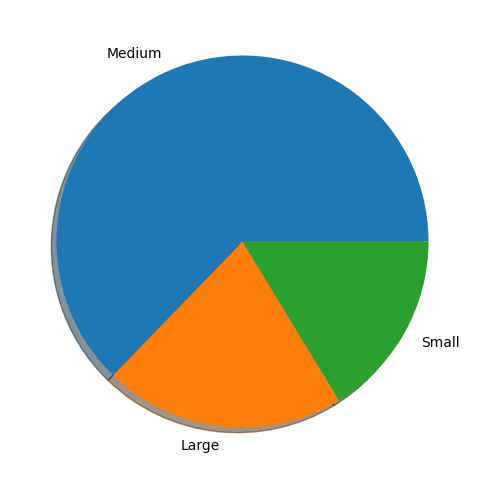

In [40]:
plt.figure(figsize = (6,12))
plt.pie(x = values,labels=labels,shadow = True)